# Test Normal model implementation

In [82]:
import numpy as np
import pandas as pd
from option_models import basket
from option_models import basket_Levy
from matplotlib import pyplot as plt

In [83]:
### only run this when you changed the class definition
import imp
imp.reload(basket)

<module 'option_models.basket' from 'C:\\Users\\Jeremy\\Documents\\GitHub\\Project-team_asap\\option_models\\basket.py'>

weights: [1 0 0 0]
cor_m: [[ 1.   0.2  0.2  0.2]
 [ 0.2  1.   0.2  0.2]
 [ 0.2  0.2  1.   0.2]
 [ 0.2  0.2  0.2  1. ]]
              bsm       levy       gap
strike                                
80      20.966246  21.185930  0.219683
81      20.392491  20.348379 -0.044112
82      19.411348  19.526455  0.115107
83      18.688030  18.720866  0.032836
84      17.839564  17.932279  0.092715
85      17.479963  17.161318 -0.318645
86      16.281437  16.408558  0.127121
87      15.715544  15.674521 -0.041024
88      15.045410  14.959672 -0.085738
89      14.053731  14.264418  0.210687
90      13.378211  13.589108  0.210898
91      13.158683  12.934027 -0.224656
92      12.408516  12.299398 -0.109118
93      11.606454  11.685384  0.078930
94      11.004783  11.092085  0.087302
95      10.463285  10.519541  0.056256
96      10.017865   9.967734 -0.050131
97       9.643761   9.436589 -0.207173
98       8.762569   8.925975  0.163406
99       8.342360   8.435711  0.093352
100      7.827443   7.9

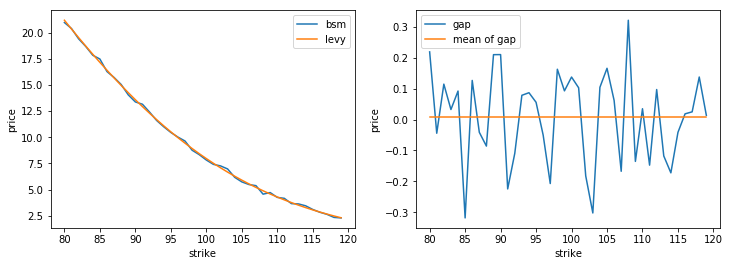

In [129]:
# A trivial test case 1: 
# one asset have 100% weight (the others zero)
# the case should be equivalent to the BSM or Normal model price

spot = np.ones(4) * 100
vol = np.ones(4) * 0.2
weights = np.array([1, 0, 0, 0])
divr = np.zeros(4)
intr = 0
cor_m = 0.8*np.identity(4) + 0.2*np.ones((4,4))
texp = 1
print('weights:',weights);print('cor_m:',cor_m)

strikeRange = np.arange(80,120,1)
bsmList=[]
levyList=[]

for strike in strikeRange:
    bsmList.append(basket.basket_price_mc(strike, spot, vol, weights, texp, cor_m, bsm=True))
    levyList.append(basket_Levy.basket_price_Levy(strike, spot, vol, weights, texp, cor_m))

priceFrm=pd.DataFrame({'bsm':bsmList,'levy':levyList},index=strikeRange)
priceFrm['gap']=priceFrm['levy']-priceFrm['bsm']
priceFrm.index.name='strike'
print (priceFrm)

fig=plt.figure(figsize=(12,4))
ax1=fig.add_subplot(1,2,1)
ax2=fig.add_subplot(1,2,2)
ax1.plot(strikeRange,bsmList,label='bsm')
ax1.plot(strikeRange,levyList,label='levy')
ax2.plot(strikeRange,priceFrm.gap,label='gap')
ax2.plot(strikeRange,[np.mean(priceFrm.gap)]*len(strikeRange),label='mean of gap')
ax1.legend(loc='best')
ax2.legend(loc='best')
ax1.set_xlabel('strike')
ax2.set_xlabel('strike')
ax1.set_ylabel('price')
ax2.set_ylabel('price')
plt.show()
# write your own normal model pricing here and compare
# do the similar for BSM model

weights: [ 0.25  0.25  0.25  0.25]
cor_m: [[ 1.      0.9999  0.9999  0.9999]
 [ 0.9999  1.      0.9999  0.9999]
 [ 0.9999  0.9999  1.      0.9999]
 [ 0.9999  0.9999  0.9999  1.    ]]
              bsm       levy       gap
strike                                
80      21.251437  21.185787 -0.065651
81      20.610298  20.348226 -0.262073
82      19.465988  19.526291  0.060303
83      18.605308  18.720690  0.115382
84      17.955017  17.932092 -0.022925
85      17.109232  17.161121  0.051889
86      16.312621  16.408350  0.095729
87      15.889387  15.674303 -0.215084
88      15.138632  14.959444 -0.179188
89      14.267500  14.264181 -0.003319
90      13.312234  13.588862  0.276628
91      13.109033  12.933772 -0.175260
92      12.208028  12.299136  0.091108
93      11.683335  11.685115  0.001780
94      11.067743  11.091810  0.024067
95      10.504530  10.519260  0.014730
96      10.012371   9.967449 -0.044923
97       9.564430   9.436299 -0.128131
98       8.871233   8.925682  0.05444

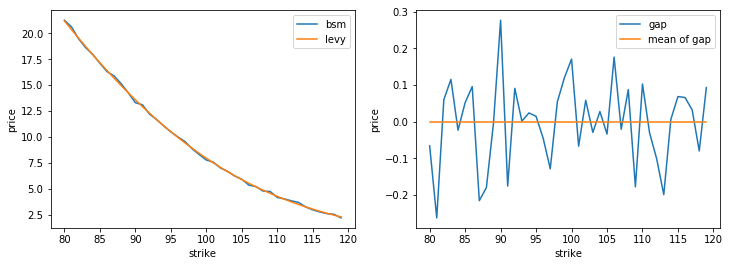

In [130]:
# A trivial test case 2

# all assets almost perfectly correlated:
# the case should be equivalent to the BSM or Normal model price

spot = np.ones(4) * 100
vol = np.ones(4) * 0.2
weights = np.ones(4) * 0.25
divr = np.zeros(4)
intr = 0
cor_m = 0.0001*np.identity(4) + 0.9999*np.ones((4,4))
texp = 1

print('weights:',weights);print('cor_m:',cor_m)

strikeRange = np.arange(80,120,1)
bsmList=[]
levyList=[]

for strike in strikeRange:
    bsmList.append(basket.basket_price_mc(strike, spot, vol, weights, texp, cor_m, bsm=True))
    levyList.append(basket_Levy.basket_price_Levy(strike, spot, vol, weights, texp, cor_m))

priceFrm=pd.DataFrame({'bsm':bsmList,'levy':levyList},index=strikeRange)
priceFrm['gap']=priceFrm['levy']-priceFrm['bsm']
priceFrm.index.name='strike'
print (priceFrm)

fig=plt.figure(figsize=(12,4))
ax1=fig.add_subplot(1,2,1)
ax2=fig.add_subplot(1,2,2)
ax1.plot(strikeRange,bsmList,label='bsm')
ax1.plot(strikeRange,levyList,label='levy')
ax2.plot(strikeRange,priceFrm.gap,label='gap')
ax2.plot(strikeRange,[np.mean(priceFrm.gap)]*len(strikeRange),label='mean of gap')
ax1.legend(loc='best')
ax2.legend(loc='best')
ax1.set_xlabel('strike')
ax2.set_xlabel('strike')
ax1.set_ylabel('price')
ax2.set_ylabel('price')
plt.show()
# write your own normal model pricing here and compare
# do the similar for BSM model

In [131]:
# A test set for spread option

spot = np.array([100, 96])
vol = np.array([0.2, 0.1])
weights = np.array([1, -1])
divr = np.array([1, 1])*0.05
intr = 0.1
cor_m = np.array([[1, 0.5], [0.5, 1]])
texp = 1

price = 8.5132252

weights: [ 1 -1]
cor_m: [[ 1.   0.5]
 [ 0.5  1. ]]


weights: [ 1 -1]
cor_m: [[ 1.   0.5]
 [ 0.5  1. ]]


C:\Users\Jeremy\Documents\GitHub\Project-team_asap\option_models\basket_Levy.py:46: RuntimeWarning: divide by zero encountered in log
  d1 = (m - np.log(strike) + v2) / v


             bsm      levy       gap
strike                              
0       8.962500  4.000000 -4.962500
1       8.348240  3.335758 -5.012482
2       7.847422  2.949330 -4.898092
3       7.312372  2.672021 -4.640351
4       6.758295  2.456446 -4.301848
5       6.386596  2.281084 -4.105512
6       6.046063  2.134098 -3.911965
7       5.506952  2.008224 -3.498728
8       5.283956  1.898659 -3.385297
9       4.797022  1.802059 -2.994963
10      4.441188  1.715997 -2.725192
11      4.219733  1.638658 -2.581075
12      3.955358  1.568648 -2.386710
13      3.610720  1.504875 -2.105845
14      3.315754  1.446465 -1.869289
15      3.057753  1.392712 -1.665041
16      2.929426  1.343033 -1.586393
17      2.657046  1.296948 -1.360098
18      2.372696  1.254050 -1.118646
19      2.299891  1.213996 -1.085895
20      2.033141  1.176493 -0.856648
21      1.903713  1.141290 -0.762423
22      1.717814  1.108166 -0.609647
23      1.570148  1.076934 -0.493214
24      1.544220  1.047425 -0.496796
2

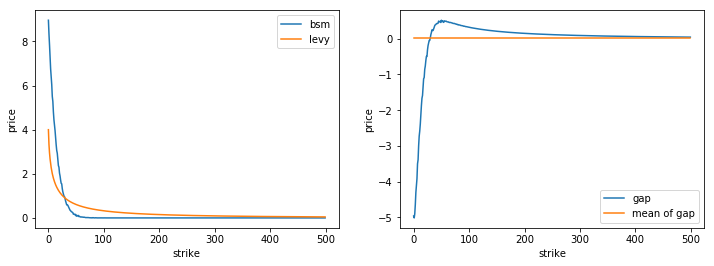

In [133]:
# MC price based on normal model
# make sure that the prices are similar\

print('weights:',weights);print('cor_m:',cor_m)

np.random.seed(123456)
strikeRange = np.arange(0,500,1)
bsmList=[]
levyList=[]

for strike in strikeRange:
    bsmList.append(basket.basket_price_mc(strike, spot, vol, weights, texp, cor_m, bsm=True))
    levyList.append(basket_Levy.basket_price_Levy(strike, spot, vol, weights, texp, cor_m))

priceFrm=pd.DataFrame({'bsm':bsmList,'levy':levyList},index=strikeRange)
priceFrm['gap']=priceFrm['levy']-priceFrm['bsm']
priceFrm.index.name='strike'
print (priceFrm)

fig=plt.figure(figsize=(12,4))
ax1=fig.add_subplot(1,2,1)
ax2=fig.add_subplot(1,2,2)
ax1.plot(strikeRange,bsmList,label='bsm')
ax1.plot(strikeRange,levyList,label='levy')
ax2.plot(strikeRange,priceFrm.gap,label='gap')
ax2.plot(strikeRange,[np.mean(priceFrm.gap)]*len(strikeRange),label='mean of gap')
ax1.legend(loc='best')
ax2.legend(loc='best')
ax1.set_xlabel('strike')
ax2.set_xlabel('strike')
ax1.set_ylabel('price')
ax2.set_ylabel('price')
plt.show()

#we can find if we price the spread option with levy model, the gap is very large when strike approaches 0

In [141]:
# A test set for basket option
spot = np.ones(4) * 100
vol = np.ones(4) * 0.4
weights = np.ones(4) * 0.25
divr = np.zeros(4)
intr = 0
cor_m = 0.5*np.identity(4) + 0.5*np.ones((4,4))
texp = 5
price = 28.0073695

weights: [ 0.25  0.25  0.25  0.25]
cor_m: [[ 1.   0.5  0.5  0.5]
 [ 0.5  1.   0.5  0.5]
 [ 0.5  0.5  1.   0.5]
 [ 0.5  0.5  0.5  1. ]]
              bsm       levy       gap
strike                                
80      35.961361  36.398241  0.436880
81      35.919940  35.921035  0.001095
82      35.166599  35.450670  0.284071
83      35.649852  34.987055 -0.662797
84      34.961189  34.530098 -0.431091
85      33.911062  34.079709  0.168647
86      34.031917  33.635796 -0.396121
87      32.914210  33.198270  0.284060
88      32.727682  32.767041  0.039360
89      32.597382  32.342021 -0.255361
90      31.861641  31.923122  0.061481
91      31.485434  31.510255  0.024821
92      31.181764  31.103336 -0.078428
93      31.016886  30.702278 -0.314608
94      30.531604  30.306996 -0.224608
95      29.650712  29.917406  0.266694
96      29.146306  29.533426  0.387120
97      28.495806  29.154973  0.659167
98      27.979567  28.781965  0.802399
99      28.717035  28.414323 -0.302712
100    

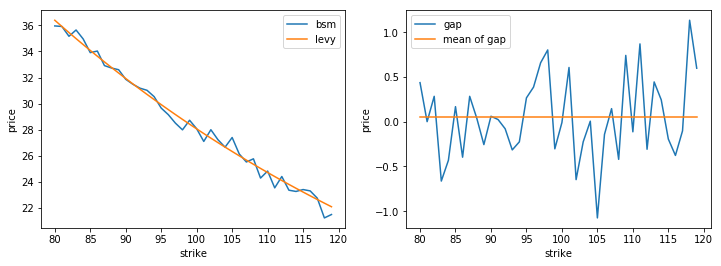

In [142]:
# MC price based on normal model
# make sure that the prices are similar
print('weights:',weights);print('cor_m:',cor_m)

strikeRange = np.arange(80,120,1)
bsmList=[]
levyList=[]

for strike in strikeRange:
    bsmList.append(basket.basket_price_mc(strike, spot, vol, weights, texp, cor_m, bsm=True))
    levyList.append(basket_Levy.basket_price_Levy(strike, spot, vol, weights, texp, cor_m))

priceFrm=pd.DataFrame({'bsm':bsmList,'levy':levyList},index=strikeRange)
priceFrm['gap']=priceFrm['levy']-priceFrm['bsm']
priceFrm.index.name='strike'
print (priceFrm)

fig=plt.figure(figsize=(12,4))
ax1=fig.add_subplot(1,2,1)
ax2=fig.add_subplot(1,2,2)
ax1.plot(strikeRange,bsmList,label='bsm')
ax1.plot(strikeRange,levyList,label='levy')
ax2.plot(strikeRange,priceFrm.gap,label='gap')
ax2.plot(strikeRange,[np.mean(priceFrm.gap)]*len(strikeRange),label='mean of gap')
ax1.legend(loc='best')
ax2.legend(loc='best')
ax1.set_xlabel('strike')
ax2.set_xlabel('strike')
ax1.set_ylabel('price')
ax2.set_ylabel('price')
plt.show()

#we can see the levy method much more volatile than bsm model when the vol gets higher